In [3]:
push!(LOAD_PATH, "..")
using ASE
using MatSciPy
using PyPlot
using PyCall
using TightBinding

### Test band structure of Silicon

In [3]:
at = bulk("Si"; cubic=true)
at = repeat(at, (2, 2, 2))
set_pbc!(at, [true, true, true])
X = positions(at)
# plot3D(X[1,:][:], X[2,:][:], X[3,:][:], "b.")
print(length(at))
cell(at)

64

3x3 Array{Float64,2}:
 10.86   0.0    0.0 
  0.0   10.86   0.0 
  0.0    0.0   10.86

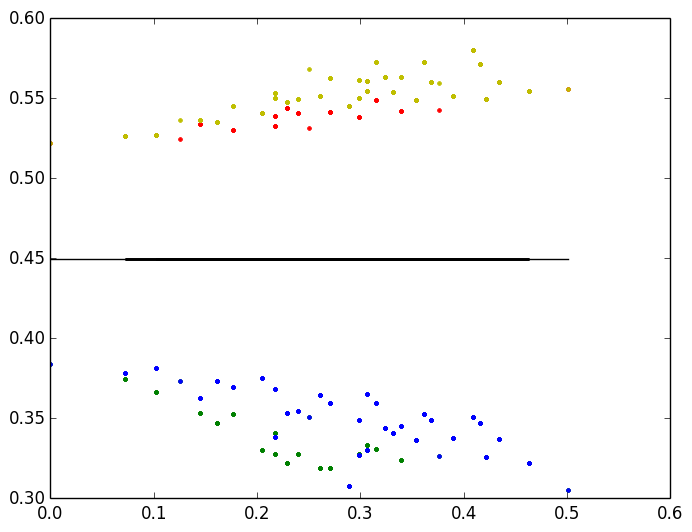

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x101d8590>

In [5]:
import NRLTB
reload("TightBinding")
reload("NRLTB")
tbm = NRLTB.NRLTBModel(elem = NRLTB.Si_sp)

tbm.nkpoints = (8,8,8)

K, E = TightBinding.band_structure(at, tbm)

# take a very low temperature to approximate the fermi level at 0 temperature
tbm.fixed_eF = false
tbm.smearing.beta = 500
TightBinding.update_eF!(at, tbm)
EF = tbm.eF

n = size(K,2)
kk = zeros(n)
for k = 1:n
    kk[k] = norm(K[:,k])
end

plot(kk, E[1,:][:], "g.")
hold
plot(kk, E[2,:][:], "b.")
plot(kk, E[3,:][:], "r.")
plot(kk, E[4,:][:], "y.")
plot(kk, ones(n)*EF, "k-" )

In [5]:
# remove an atom at center

X = positions(at)
na = length(at)
Y = zeros(3,na-1)
Y = X[:,1:na-1]

3x63 Array{Float64,2}:
 0.0  1.3575  0.0    1.3575  2.715  …  5.43   6.7875  8.145  9.5025  8.145
 0.0  1.3575  2.715  4.0725  0.0       8.145  9.5025  5.43   6.7875  8.145
 0.0  1.3575  2.715  4.0725  2.715     8.145  9.5025  8.145  9.5025  5.43 

In [7]:
using PyCall
@pyimport ase

#at_vac = ase.Atoms()
at_vac = ASEAtoms( ase.Atoms("Si63") )
set_cell!(at_vac, cell(at))
set_positions!(at_vac, Y)
set_pbc!(at_vac, [true, true, true])

X_vac = positions(at_vac)
# plot3D(X_vac[1,:][:], X_vac[2,:][:], X_vac[3,:][:], "b.")
print(length(at_vac))

63

0.36875025045671966

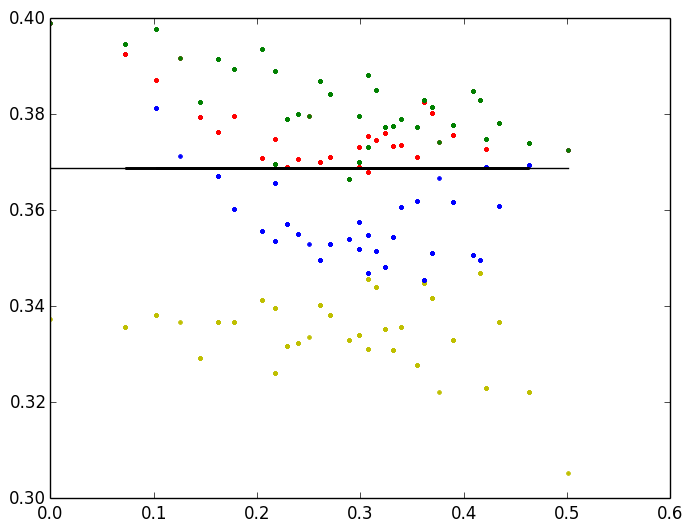

In [8]:
import NRLTB
reload("TightBinding")
reload("NRLTB")
tbm = NRLTB.NRLTBModel(elem = NRLTB.Si_sp)

set_pbc!(at_vac, [true, true, true])
tbm.nkpoints = (8,8,8)

K, E = TightBinding.band_structure(at_vac, tbm)

# take a very low temperature to approximate the fermi level at 0 temperature
tbm.fixed_eF = false
tbm.smearing.beta = 1000
TightBinding.update_eF!(at_vac, tbm)
EF = tbm.eF

n = size(K,2)
kk = zeros(n)
for k = 1:n
    kk[k] = norm(K[:,k])
end

plot(kk, E[1,:][:], "y.")
hold
plot(kk, E[2,:][:], "b.")
plot(kk, E[3,:][:], "r.")
plot(kk, E[4,:][:], "g.")
plot(kk, ones(n)*EF, "k-" )

print(EF)

### Test band structure of Carbon

In [9]:
at = bulk("C"; cubic=true)
at = repeat(at, (2, 2, 2))
X = positions(at)
# set_pbc!(at, [false, false, false])
# plot3D(X[1,:][:], X[2,:][:], X[3,:][:], "b.")
print(length(at))

64

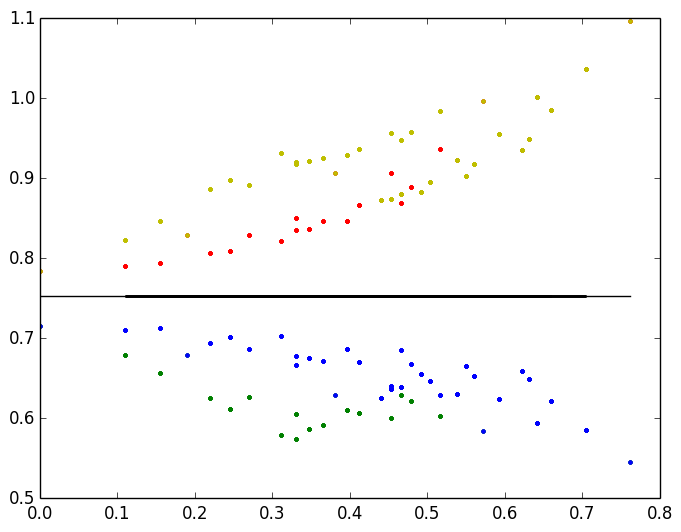

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fc4a50>

In [10]:
import NRLTB
reload("TightBinding")
reload("NRLTB")
tbm = NRLTB.NRLTBModel(elem = NRLTB.C_sp)

set_pbc!(at, [true, true, true])
tbm.nkpoints = (8,8,8)

K, E = TightBinding.band_structure(at, tbm)

# take a very low temperature to approximate the fermi level at 0 temperature
tbm.fixed_eF = false
tbm.smearing.beta = 500
TightBinding.update_eF!(at, tbm)
EF = tbm.eF

n = size(K,2)
kk = zeros(n)
for k = 1:n
    kk[k] = norm(K[:,k])
end

plot(kk, E[1,:][:], "g.")
hold
plot(kk, E[2,:][:], "b.")
plot(kk, E[3,:][:], "r.")
plot(kk, E[4,:][:], "y.")
plot(kk, ones(n)*EF, "k-" )

In [11]:
tbm.eF

0.7528702442113451

In [12]:
# remove an atom at center

X = positions(at)
na = length(at)
Y = zeros(3,na-1)
Y = X[:,1:na-1]

# from ase import Atoms
# using PyCall
# @pyimport ase
# at_vac = ASEAtoms( ase.Atoms(symbols = "C63", positions = Y, cell = cell(at), pbc = [true, true, true]) )

3x63 Array{Float64,2}:
 0.0  0.8925  0.0    0.8925  1.785  …  3.57   4.4625  5.355  6.2475  5.355
 0.0  0.8925  1.785  2.6775  0.0       5.355  6.2475  3.57   4.4625  5.355
 0.0  0.8925  1.785  2.6775  1.785     5.355  6.2475  5.355  6.2475  3.57 

In [13]:
using PyCall
@pyimport ase

#at_vac = ase.Atoms()
at_vac = ASEAtoms( ase.Atoms("C63") )
set_cell!(at_vac, cell(at))
set_positions!(at_vac, Y)
set_pbc!(at_vac, [true, true, true])

X_vac = positions(at_vac)
#plot3D(X_vac[1,:][:], X_vac[2,:][:], X_vac[3,:][:], "b.")
print(length(at_vac))

63

0.6795231949119179

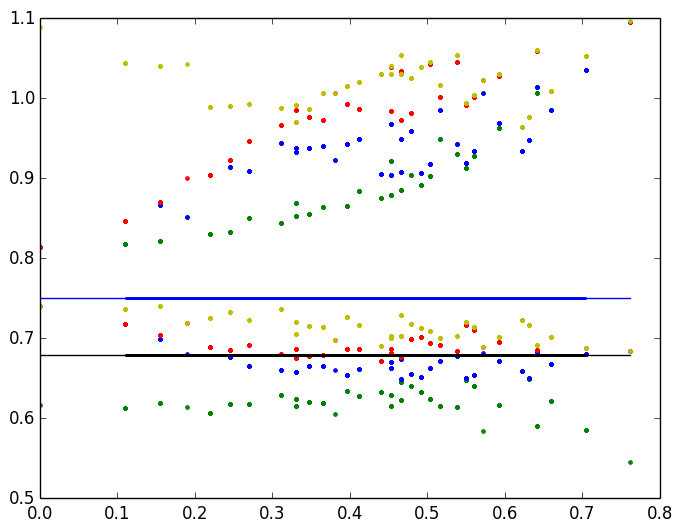

In [14]:
import NRLTB
reload("TightBinding")
reload("NRLTB")
tbm = NRLTB.NRLTBModel(elem = NRLTB.C_sp)

set_pbc!(at_vac, [true, true, true])
tbm.nkpoints = (8,8,8)

K, E = TightBinding.band_structure(at_vac, tbm)

# take a very low temperature to approximate the fermi level at 0 temperature
tbm.fixed_eF = false
tbm.smearing.beta = 500
TightBinding.update_eF!(at_vac, tbm)
EF = tbm.eF

n = size(K,2)
kk = zeros(n)
for k = 1:n
    kk[k] = norm(K[:,k])
end

plot(kk, E[1,:][:], "g.")
plot(kk, E[2,:][:], "b.")
plot(kk, E[3,:][:], "r.")
plot(kk, E[4,:][:], "y.")
plot(kk, E[5,:][:], "g.")
plot(kk, E[6,:][:], "b.")
plot(kk, E[7,:][:], "r.")
plot(kk, E[8,:][:], "y.")
plot(kk, ones(n)*EF, "k-" )
plot(kk, ones(n)*0.7502348995952292, "-" )

print(EF)

### Test toy TB model for Al

In [4]:
at = bulk("Al")#; cubic=true)
at = repeat(at, (2, 2, 2))
X = positions(at)
# set_pbc!(at, [false, false, false])
# plot3D(X[1,:][:], X[2,:][:], X[3,:][:], "b.")
print(length(at))

8

In [3]:
# reload("Potentials")
# reload("tbtoymodel")
# reload("TightBinding")
# reload("MatSciPy")
tbm = TightBinding.ToyTB.ToyTBModel(r0=2.5, rcut=6.0)
E = TightBinding.potential_energy(at, tbm)
println("E = ", E)
frc = TightBinding.forces(at, tbm)
println("|f|∞ = ", norm(frc[:], Inf))

E = -15.758671486710963
|f|∞ = 4.40619762898109e-16


In [7]:
set_pbc!(at, [false, false, false])

reload("TightBinding")
tbm = TightBinding.ToyTB.ToyTBModel(r0=2.5, rcut=6.0)
E = TightBinding.potential_energy(at, tbm)
println("E = ", E)
frc = TightBinding.forces(at, tbm)
println("|f|∞ = ", norm(frc[:], Inf))

E = -

2.2402263145143673
|f|∞ = 0.14601367064044007


In [5]:
reload("Potentials")
reload("TightBinding")
reload("tbtoymodel")

set_pbc!(at, [false, false, false])
#set_pbc!(at, [true, true, true])

tbm = TightBinding.ToyTB.ToyTBModel(r0=2.5, rcut=8.0)
X = positions(at)
f = TightBinding.potential_energy(at, tbm)
df = TightBinding.forces(at, tbm)[:]
    println("-----------------------------")
    println("  p | error ")
    println("----|------------------------")
    for p = 2:12
        h = 0.1^p
        dfh = zeros(length(df))
        for n = 1:length(df)
            X[n] += h
            set_positions!(at, X)
            dfh[n] = (TightBinding.potential_energy(at, tbm) - f) / h
            X[n] -= h
        end
    #@printf(" %2d | %1.7e \n", p, norm(df - dfh, Inf))
    @printf(" %2d | %1.7e \n", p, norm(dfh + df, Inf))
    end
println("-----------------------------")


-----------------------------
  p | error 
----|------------------------
  2 | 1.4867346e-03 
  3 | 1.4867270e-04 
  4 | 1.4867263e-05 
  5 | 1.4865886e-06 
  6 | 1.5010215e-07 
  7 | 2.4461734e-08 
  8 | 3.1718760e-07 
  9 | 3.1797765e-06 
 10 | 3.8596093e-05 
 11 | 3.8683979e-04 
 12 | 3.9968029e-03 
-----------------------------


### Test NRL-TB model for Al

In [7]:
# TEST the NRL-TB hamiltonian constructor
import NRLTB
reload("NRLTB")
a = rand(3)*6

f = NRLTB.mat_local(norm(a), a, NRLTB.Al_spd, "H")
df = NRLTB.d_mat_local(norm(a), a, NRLTB.Al_spd, "dH")
println("-----------------------------")
println("  p | error ")
println("----|------------------------")
for p = 2:12
    h = 0.1^p
    dfh = zeros(size(df))
    for n = 1:3
        a[n] += h
        fh = NRLTB.mat_local(norm(a), a, NRLTB.Al_spd, "H")
        dfh[n,:] = (fh - f) / h
        a[n] -= h
    end
    err = reshape(dfh - df, 3*81)
    @printf(" %2d | %1.7e \n", p, norm(err,Inf))
end
println("-----------------------------")

-----------------------------
  p | error 
----|------------------------
  2 | 4.7936432e-04 
  3 | 4.8252387e-05 
  4 | 4.8284068e-06 
  5 | 4.8288380e-07 
  6 | 4.8356390e-08 
  7 | 4.7385025e-09 
  8 | 1.5400929e-08 
  9 | 1.1461380e-07 
 10 | 1.1590824e-06 
 11 | 9.4107278e-06 
 12 | 1.6019853e-04 
-----------------------------


In [16]:
# TEST NRL-TB for Aluminum FCC

reload("SparseTools")
reload("Potentials")
reload("TightBinding")
reload("NRLTB")    
BOHR = 0.52917721092 

set_pbc!(at, [false, false, false])
tbm = NRLTB.NRLTBModel(elem = NRLTB.Al_spd)
tbm.nkpoints = (0,0,0)

X = positions(at)
f = TightBinding.potential_energy(at, tbm)
df = TightBinding.forces(at, tbm)[:] # / BOHR
    println("-----------------------------")
    println("  p | error ")
    println("----|------------------------")
for p = 2:12
    h = 0.1^p 
    dfh = zeros(length(df))
    for n = 1:length(df)
        X[n] += h
        set_positions!(at, X)
        dfh[n] = (TightBinding.potential_energy(at, tbm) - f) / h
        X[n] -= h
    end
    @printf(" %2d | %1.7e \n", p, norm(dfh + df, Inf))
end
println("-----------------------------")

-----------------------------
  p | error 
----|------------------------
  2 | 3.3318517e-04 
  3 | 3.3257017e-05 
  4 | 3.3251270e-06 
  5 | 3.3253385e-07 
  6 | 3.2684817e-08 
  7 | 6.1106526e-08 
  8 | 8.1074127e-07 
  9 | 8.9428907e-06 
 10 | 5.5128169e-05 
 11 | 7.6567090e-04 
 12 | 4.7365781e-03 
-----------------------------


In [5]:
# TEST NRL-TB for Aluminum FCC
# WITH PERIODIC BOUNDARY CONDITION ON THIRD DIMENSION
# TAKE nkpoints = (0,0,4)

reload("SparseTools")
reload("Potentials")
reload("TightBinding")
reload("NRLTB")    
BOHR = 0.52917721092 

set_pbc!(at, [true, true, true])
tbm = NRLTB.NRLTBModel(elem = NRLTB.Al_spd)
tbm.nkpoints = (4,4,4)


X = positions(at)
f = TightBinding.potential_energy(at, tbm)
df = TightBinding.forces(at, tbm)[:] # / BOHR
    println("-----------------------------")
    println("  p | error ")
    println("----|------------------------")
for p = 2:10
    h = 0.1^p 
    dfh = zeros(length(df))
    for n = 1:length(df)
        X[n] += h
        set_positions!(at, X)
        dfh[n] = (TightBinding.potential_energy(at, tbm) - f) / h
        X[n] -= h
    end
    @printf(" %2d | %1.7e \n", p, norm(dfh + df, Inf))
end
println("-----------------------------")

-----------------------------
  p | error 
----|------------------------
  2 | 3.8865616e-04 
  3 | 3.8892178e-05 
  4 | 3.8894044e-06 
  5 | 3.8937742e-07 
  6 | 4.6185278e-08 
  7 | 1.0658141e-07 
  8 | 7.1054274e-07 
  9 | 3.5527137e-06 
 10 | 7.1054274e-05 
-----------------------------


## TEST site energy and site force

In [3]:
# TEST NRL-TB site energy for Aluminum FCC
# WITH open BOUNDARY CONDITION ON THIRD DIMENSION

using AtomsInterface
reload("SparseTools")
reload("Potentials")
reload("TightBinding")
reload("NRLTB")  

set_pbc!(at, [false, false, false])
tbm = NRLTB.NRLTBModel(elem = NRLTB.Al_spd)
tbm.nkpoints = (0,0,0)

X = positions(at)

Es_all = TightBinding.site_energy([1:length(at);], at, tbm)
Etot = TightBinding.potential_energy(at, tbm)
println("E - ∑ E_i = ", Etot - r_sum(Es_all))
println("------------------------------")

println("Finite-difference test")
Es = TightBinding.site_energy(1, at, tbm)
Fs = TightBinding.site_forces(1, at, tbm)[:]

println("-----------------------------")
println("  p | error ")
println("----|------------------------")
for p = 2:12
    h = 0.1^p 
    dEsh = zeros(length(Fs))
    for n = 1:length(Fs)
        X[n] += h
        set_positions!(at, X)
        dEsh[n] = (TightBinding.site_energy(1, at, tbm) - Es) / h
        X[n] -= h
    end
    @printf(" %2d | %1.7e \n", p, norm(dEsh + Fs, Inf))
end
println("-----------------------------")

E - ∑ E_i = 1.7763568394002505e-15
------------------------------
Finite-difference test
-----------------------------
  p | error 
----|------------------------
  2 | 1.8566967e-04 
  3 | 1.8596652e-05 
  4 | 1.8599778e-06 
  5 | 1.8603239e-07 
  6 | 2.0431525e-08 
  7 | 2.7374072e-08 
  8 | 3.2581899e-07 
  9 | 1.3966640e-06 
 10 | 1.6372396e-05 
 11 | 1.7062366e-04 
 12 | 1.6298718e-03 
-----------------------------


In [3]:
# TEST NRL-TB site energy for Aluminum FCC
# WITH periodic BOUNDARY CONDITION ON THIRD DIMENSION

using AtomsInterface
reload("SparseTools")
reload("Potentials")
reload("TightBinding")
reload("NRLTB")  

set_pbc!(at, [false, false, true])
tbm = NRLTB.NRLTBModel(elem = NRLTB.Al_spd)
tbm.nkpoints = (0,0,0)

X = positions(at)

Es_all = TightBinding.site_energy([1:length(at);], at, tbm)
Etot = TightBinding.potential_energy(at, tbm)
println("E - ∑ E_i = ", Etot - r_sum(Es_all))
println("------------------------------")

println("Finite-difference test")
Es = TightBinding.site_energy(1, at, tbm)
Fs = TightBinding.site_forces(1, at, tbm)[:]

println("-----------------------------")
println("  p | error ")
println("----|------------------------")
for p = 2:12
    h = 0.1^p 
    dEsh = zeros(length(Fs))
    for n = 1:length(Fs)
        X[n] += h
        set_positions!(at, X)
        dEsh[n] = (TightBinding.site_energy(1, at, tbm) - Es) / h
        X[n] -= h
    end
    @printf(" %2d | %1.7e \n", p, norm(dEsh + Fs, Inf))
end
println("-----------------------------")

E - ∑ E_i = -1.7763568394002505e-15
------------------------------
Finite-difference test
-----------------------------
  p | error 
----|------------------------
  2 | 4.0478141e-04 
  3 | 4.0374202e-05 
  4 | 4.0363689e-06 
  5 | 4.0347931e-07 
  6 | 4.1744386e-08 
  7 | 3.1675312e-08 
  8 | 2.0657823e-07 
  9 | 1.7763568e-06 
 10 | 1.7598920e-05 
 11 | 2.7367671e-04 
 12 | 1.7763568e-03 
-----------------------------


### performance 

In [24]:
reload("SparseTools")
reload("Potentials")
reload("TightBinding")
reload("NRLTB")    

at = bulk("Al"; cubic=true)
at = repeat(at, (2, 2, 2))
set_pbc!(at, [true, true, true])
tbm = NRLTB.NRLTBModel(elem = NRLTB.Al_spd)
tbm.nkpoints = (0,0,2)

@time df = TightBinding.forces(at, tbm)[:];
@time df = TightBinding.forces_(at, tbm)[:];
@time df = TightBinding.forces(at, tbm)[:];
@time df = TightBinding.forces_(at, tbm)[:];

ctr = 331776
  3.715835 seconds (9.36 M allocations: 1.757 GB, 8.19% gc time)
ctr = 17978112
 15.347712 seconds (111.72 M allocations: 2.286 GB, 3.60% gc time)
ctr = 331776
  1.342842 seconds (5.29 M allocations: 1.259 GB, 16.70% gc time)
ctr = 17978112
 15.253434 seconds (111.57 M allocations: 2.280 GB, 3.55% gc time)


# Performance Tests (CO)

In [1]:
push!(LOAD_PATH, "..")
using ASE, TestAtoms
import TightBinding
import NRLTB
import ProfileView, Base.Profile

In [3]:
at = bulk("Al"; cubic=true)
at = repeat(at, (2, 2, 1))
set_pbc!(at, [false, false, true])
X = positions(at)
tbm = NRLTB.NRLTBModel(elem = NRLTB.Al_spd)
# tbm = TightBinding.ToyTB.ToyTBModel()
tbm.nkpoints = (0,0,0)
TestAtoms.test_potentialenergy(tbm, at)
set_positions!(at, X+0.1*rand(size(X)))
@time E = TightBinding.potential_energy(at, tbm)
set_positions!(at, X+0.1*rand(size(X)))
@time E = TightBinding.potential_energy(at, tbm)
set_positions!(at, X+0.1*rand(size(X)))
@time E = TightBinding.potential_energy(at, tbm)
set_positions!(at, X+0.1*rand(size(X)))
@time E = TightBinding.potential_energy(at, tbm)

@time df = TightBinding.forces(at, tbm);
@time df = TightBinding.forces(at, tbm);
@time df = TightBinding.forces(at, tbm);
@time df = TightBinding.forces(at, tbm);

# TightBinding.forces_debug(at, tbm)
;

-----------------------------
  p | error 
----|------------------------
  2 | 1.6082659e-03 
  3 | 1.6084285e-04 
  4 | 1.6084343e-05 
  5 | 1.6093793e-06 
  6 | 1.7053026e-07 
  7 | 1.4210855e-07 
  8 | 1.4210855e-06 
  9 | 9.0469449e-06 
 10 | 1.1677271e-04 
-----------------------------
  0.035420 seconds (49.74 k allocations: 21.602 MB, 6.34% gc time)
  0.039333 seconds (49.51 k allocations: 21.567 MB, 11.82% gc time)
  0.037315 seconds (49.51 k allocations: 21.567 MB, 6.98% gc time)
  0.037895 seconds (49.46 k allocations: 21.556 MB, 6.05% gc time)
  0.046265 seconds (138.00 k allocations: 35.888 MB, 13.48% gc time)
  0.035591 seconds (138.00 k allocations: 35.888 MB, 5.70% gc time)
  0.040717 seconds (138.00 k allocations: 35.888 MB, 10.11% gc time)
  0.038626 seconds (138.00 k allocations: 35.888 MB, 10.85% gc time)


In [13]:
@code_warntype TightBinding.hamiltonian(at, tbm, rand(3))

In [3]:


at = bulk("Al"; cubic=true)
at = repeat(at, (4, 4, 1))
X = positions(at)
set_pbc!(at, [false, false, true])
tbm = NRLTB.NRLTBModel(elem = NRLTB.Al_spd)
# tbm = TightBinding.ToyTB.ToyTBModel()
tbm.nkpoints = (0,0,4)

Profile.clear()
@profile f = TightBinding.potential_energy(at, tbm);
set_positions!(at, X+0.1*rand(size(X)))
@profile f = TightBinding.potential_energy(at, tbm);


In [ ]:
ProfileView.view()

### Test ForwardDiff for dH, d2H, and d3H

In [119]:
a = rand(3)*2

3-element Array{Float64,1}:
 1.98781
 1.17978
 1.70912

In [74]:
# TEST the ForwardDiff for NRL-TB hamiltonian derivatives
import NRLTB
reload("NRLTB")
BOHR = 0.52917721092 

h = zeros(4,4)
f = zeros(4,4)
dh = zeros(3,4,4)
# f = NRLTB.mat_local_h!(norm(a)/BOHR, a/BOHR, NRLTB.C_sp, h, zeros(4))
NRLTB.mat_local_h!(norm(a)/BOHR, a/BOHR, NRLTB.C_sp, h, zeros(4))
f[:] = h[:]
df = NRLTB.mat_local_dh!(a/BOHR, NRLTB.C_sp, dh)
println("-----------------------------")
println("  p | error ")
println("----|------------------------")
for p = 2:12
    δ = 0.1^p
    dfh = zeros(size(df))
    for n = 1:3
        a[n] += δ
        fh = NRLTB.mat_local_h!(norm(a)/BOHR, a/BOHR, NRLTB.C_sp, h, zeros(4))
        # print(fh-f) println("\n")
        dfh[n,:] = ( (fh - f) / δ ) * BOHR
        a[n] -= δ
    end
    err = reshape( dfh - df, 3*4*4)
    @printf(" %2d | %1.7e \n", p, norm(err, Inf))
end
println("-----------------------------")

-----------------------------
  p | error 
----|------------------------
  2 | 1.4692686e-01 
  3 | 1.4655823e-02 
  4 | 1.4651759e-03 
  5 | 1.4651354e-04 
  6 | 1.4652052e-05 
  7 | 1.4783159e-06 
  8 | 2.8920637e-07 
  9 | 1.9198114e-06 
 10 | 1.6164909e-05 
 11 | 1.8138166e-04 
 12 | 1.2992752e-03 
-----------------------------


In [93]:
@time NRLTB.d_mat_local(norm(a)/BOHR, a/BOHR, NRLTB.C_sp, :dH)
@time NRLTB.mat_local_dh!(a/BOHR, NRLTB.C_sp, dh)
@time NRLTB.d_mat_local(norm(a)/BOHR, a/BOHR, NRLTB.C_sp, :dH)
@time NRLTB.mat_local_dh!(a/BOHR, NRLTB.C_sp, dh)
@time NRLTB.d_mat_local(norm(a)/BOHR, a/BOHR, NRLTB.C_sp, :dH)
@time NRLTB.mat_local_dh!(a/BOHR, NRLTB.C_sp, dh)

# c = NRLTB.d_mat_local(norm(a)/BOHR, a/BOHR, NRLTB.C_sp, :dH)
# d = NRLTB.mat_local_dh!(a/BOHR, NRLTB.C_sp, dh)
# c-d

3-element Array{Float64,1}:
 0.0475555
 0.1646   
 0.428756 

0.000011 seconds (28 allocations: 1.656 KB)
  0.000585 seconds (3.33 k allocations: 149.031 KB)
  0.000008 seconds (28 allocations: 1.656 KB)
  0.000502 seconds (3.33 k allocations: 149.031 KB)
  0.000005 seconds (28 allocations: 1.656 KB)
  0.000476 seconds (3.33 k allocations: 149.031 KB)


In [96]:
# TEST the ForwardDiff for NRL-TB hamiltonian derivatives
import NRLTB
reload("NRLTB")
BOHR = 0.52917721092 

h = zeros(9,9)
f = zeros(9,9)
dh = zeros(3,9,9)
# f = NRLTB.mat_local_h!(norm(a)/BOHR, a/BOHR, NRLTB.C_sp, h, zeros(10))
NRLTB.mat_local_h!(norm(a)/BOHR, a/BOHR, NRLTB.Al_spd, h, zeros(10))
f[:] = h[:]
df = NRLTB.mat_local_dh!(a/BOHR, NRLTB.Al_spd, dh)
println("-----------------------------")
println("  p | error ")
println("----|------------------------")
for p = 2:12
    δ = 0.1^p
    dfh = zeros(size(df))
    for n = 1:3
        a[n] += δ
        fh = NRLTB.mat_local_h!(norm(a)/BOHR, a/BOHR, NRLTB.Al_spd, h, zeros(10))
        # print(fh-f) println("\n")
        dfh[n,:] = ( (fh - f) / δ ) * BOHR
        a[n] -= δ
    end
    err = reshape( dfh - df, 3*9*9)
    @printf(" %2d | %1.7e \n", p, norm(err, Inf))
end
println("-----------------------------")

-----------------------------
  p | error 
----|------------------------
  2 | 2.5225810e-02 
  3 | 2.5536039e-03 
  4 | 2.5567314e-04 
  5 | 2.5570485e-05 
  6 | 2.5569243e-06 
  7 | 2.5769524e-07 
  8 | 1.9273895e-08 
  9 | 2.7955619e-07 
 10 | 4.7913139e-06 
 11 | 2.3738341e-05 
 12 | 3.0439661e-04 
-----------------------------


In [120]:
# test hessian
import NRLTB
reload("NRLTB")
BOHR = 0.52917721092 

norb = 9
b = a/BOHR
dh = zeros(3,3,norb,norb)

h = zeros(3,norb,norb)
f = zeros(3,norb,norb)
dh = zeros(3,3,norb,norb)

f = NRLTB.d_mat_local(norm(a)/BOHR, a/BOHR, NRLTB.Al_spd, :dH)
# NRLTB.mat_local_dh!(a/BOHR, NRLTB.Al_spd, h)
# f[:] = h[:]
df = NRLTB.mat_local_d2h!(a/BOHR, NRLTB.Al_spd, dh)

println("-----------------------------")
println("  p | error ")
println("----|------------------------")
for p = 2:12
    δ = 0.1^p
    dfh = zeros(size(df))
    for n = 1:3
        a[n] += δ
        fh = NRLTB.mat_local_dh!(a/BOHR, NRLTB.Al_spd, h)
        dfh[n,:] = ( (fh - f) / δ ) * BOHR
        a[n] -= δ
    end
    err = reshape( dfh - df, 3*3*norb*norb)
    @printf(" %2d | %1.7e \n", p, norm(err, Inf))
end
println("-----------------------------")

-----------------------------
  p | error 
----|------------------------
  2 | 1.1097911e-03 
  3 | 1.1184019e-04 
  4 | 1.1192619e-05 
  5 | 1.1193473e-06 
  6 | 1.1196467e-07 
  7 | 1.1699649e-08 
  8 | 3.9737777e-09 
  9 | 3.5471394e-08 
 10 | 3.8430232e-07 
 11 | 3.1913057e-06 
 12 | 4.1979214e-05 
-----------------------------


In [122]:
# test 3rd order derivatives
import NRLTB
reload("NRLTB")
BOHR = 0.52917721092 

norb = 9
b = a/BOHR
dh = zeros(3,3,3,norb,norb)

h = zeros(3,3,norb,norb)
f = zeros(3,3,norb,norb)
dh = zeros(3,3,3,norb,norb)

df = NRLTB.mat_local_d3h!(a/BOHR, NRLTB.Al_spd, dh);

NRLTB.mat_local_d2h!(a/BOHR, NRLTB.Al_spd, h)
f[:] = h[:]

println("-----------------------------")
println("  p | error ")
println("----|------------------------")
for p = 2:12
    δ = 0.1^p
    dfh = zeros(size(df))
    for n = 1:3
        a[n] += δ
        fh = NRLTB.mat_local_d2h!(a/BOHR, NRLTB.Al_spd, h)
        dfh[n,:] = ( (fh - f) / δ ) * BOHR
        a[n] -= δ
    end
    err = reshape( dfh - df, 3*3*3*norb*norb)
    @printf(" %2d | %1.7e \n", p, norm(err, Inf))
end
println("-----------------------------")

-----------------------------
  p | error 
----|------------------------
  2 | 1.5924949e-03 
  3 | 1.6047012e-04 
  4 | 1.6059212e-05 
  5 | 1.6060387e-06 
  6 | 1.6059271e-07 
  7 | 1.5805842e-08 
  8 | 4.2130031e-09 
  9 | 6.0635505e-08 
 10 | 6.3945451e-07 
 11 | 6.3363962e-06 
 12 | 3.5753329e-05 
-----------------------------
